###SUPER-MARKET-SALE-ANALYISIS
###GROUP-MEMBERS:
###UJALA-SULTAN(FA17-BCS-092)
###ZAIN-ALI(FA17-BCS-099)


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../"))



['sys', 'lib64', 'var', 'dev', 'usr', 'opt', 'media', 'run', 'root', 'tmp', 'home', 'srv', 'mnt', 'boot', 'sbin', 'proc', 'lib', 'etc', 'bin', 'supermarket_sales - Sheet1.csv', '.dockerenv', 'tools', 'datalab', 'swift', 'content', 'tensorflow-1.15.2', 'lib32']


In [ ]:
sales = pd.read_csv('../supermarket_sales - Sheet1.csv')

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [ ]:
sales['date'] = pd.to_datetime(sales['Date'])


In [ ]:
sales['date'].dtype

dtype('<M8[ns]')

In [ ]:
type(sales['date'])

pandas.core.series.Series

In [ ]:
sales['date'] = pd.to_datetime(sales['date'])

In [ ]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [ ]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [ ]:
  sales['Hour'] = (sales['Time']).dt.hour    

Let's see the unique hours of sales in this dataset

In [ ]:
sales['Hour'].nunique()   

11

In [ ]:
  sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [ ]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [ ]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [ ]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


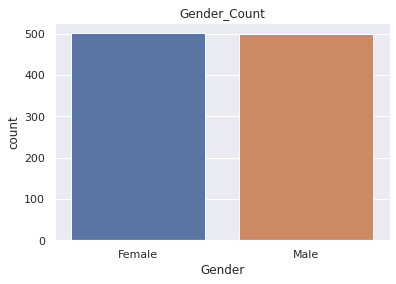

In [ ]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")



Text(0.5, 1.0, 'Ratings by Branch')

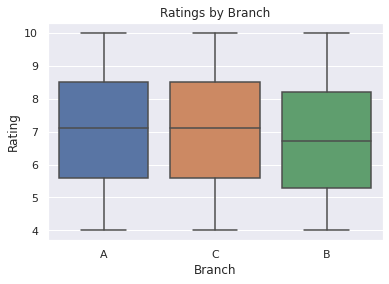

In [ ]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

Branch B has the lowest rating among all the branches

*Sales by the hour in the comapny* Most of the item were sold around 14:00 hrs local time

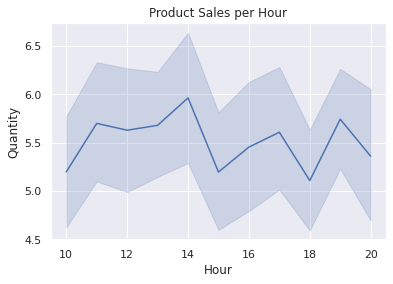

In [ ]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion 

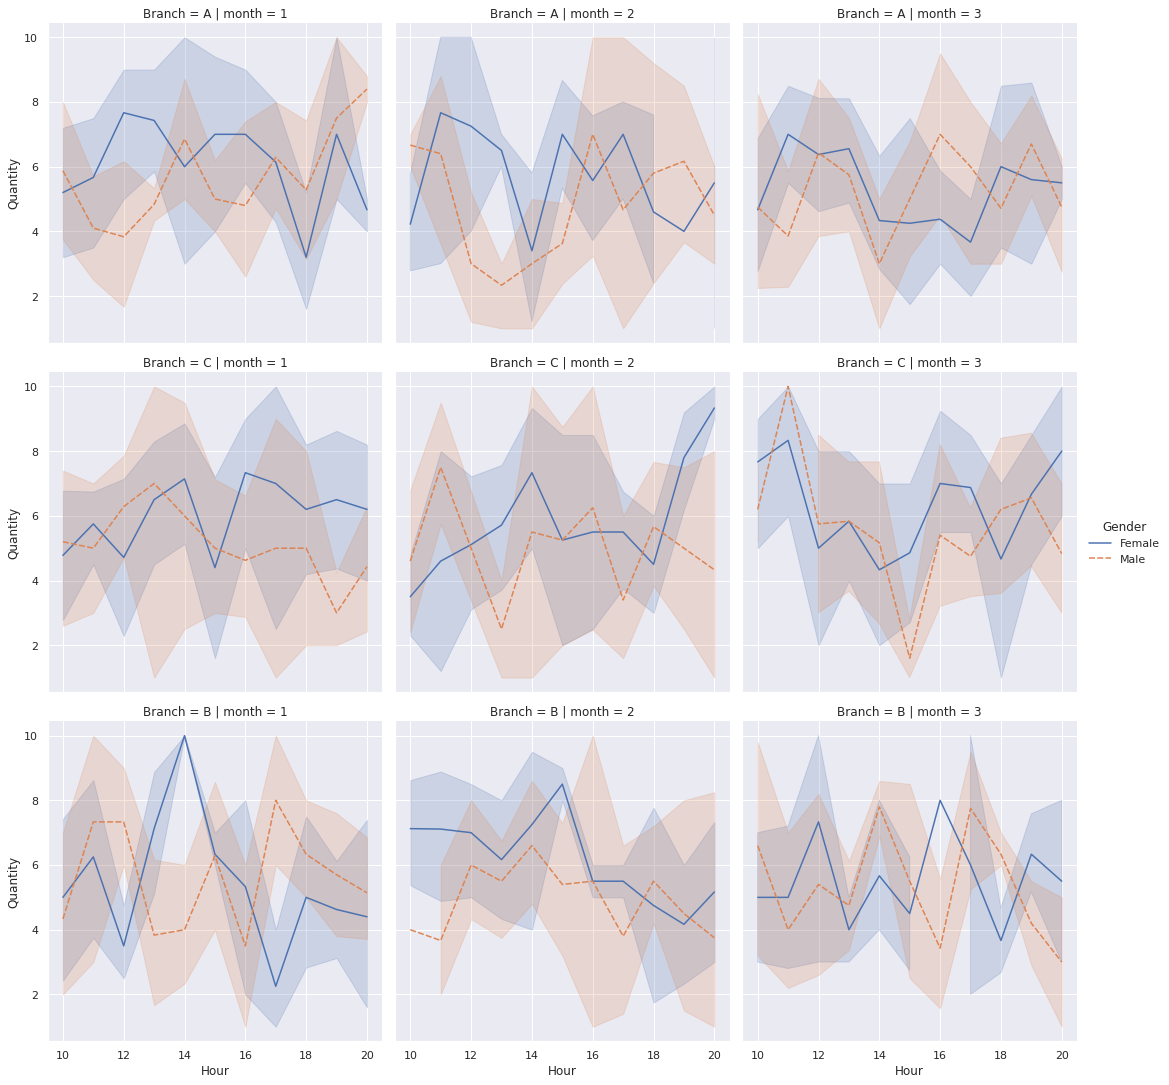

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

 Below we can see each branch's sales by the hour in a monthly fashion 

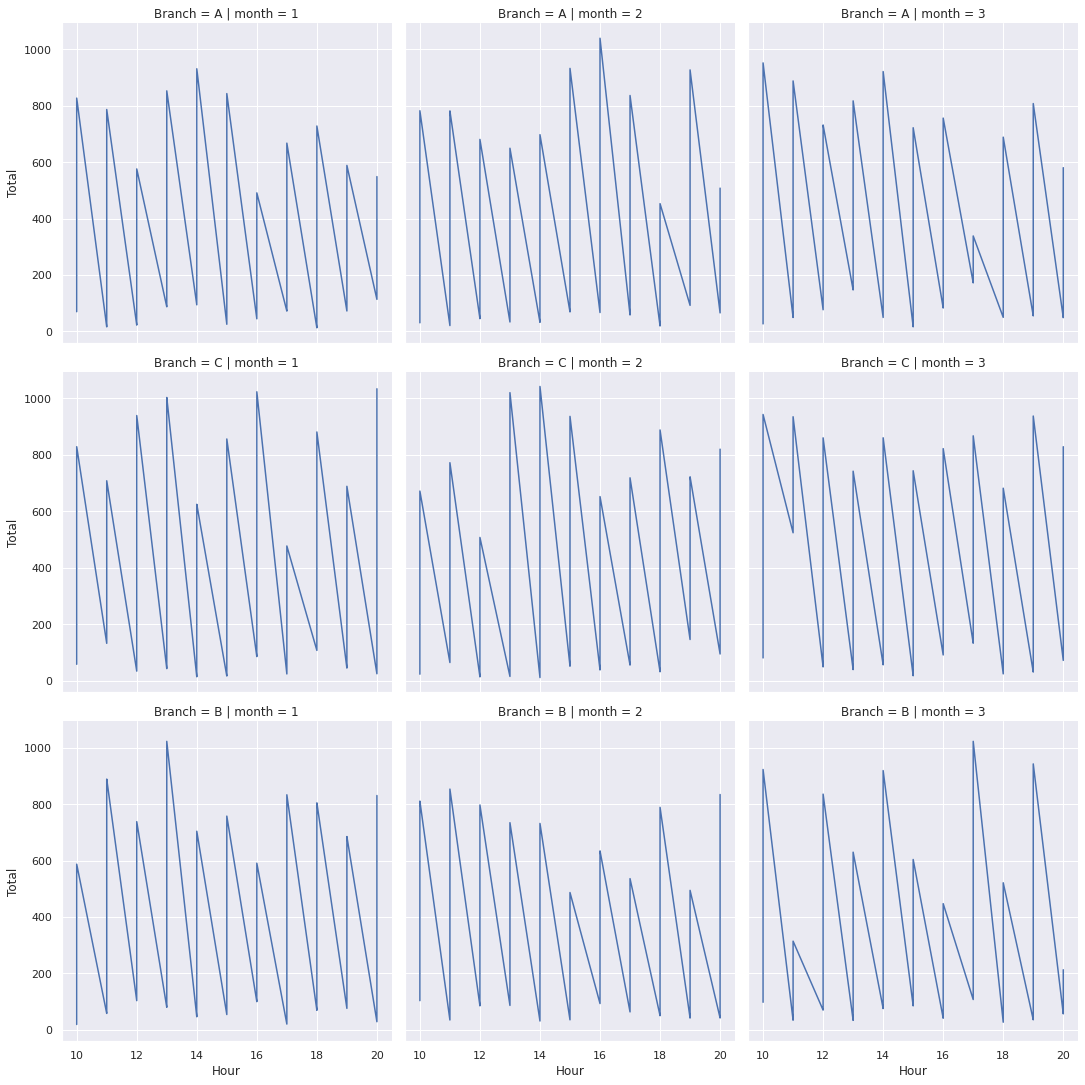

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [ ]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

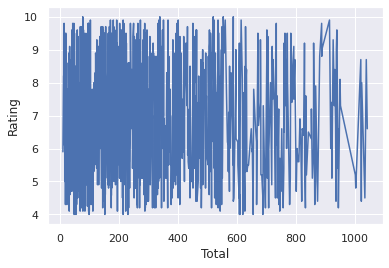

In [ ]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

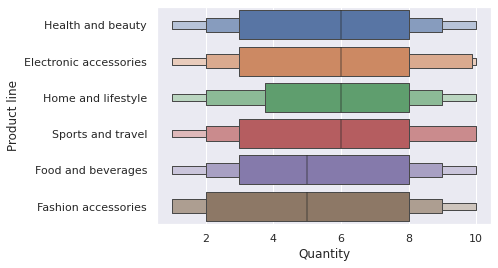

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

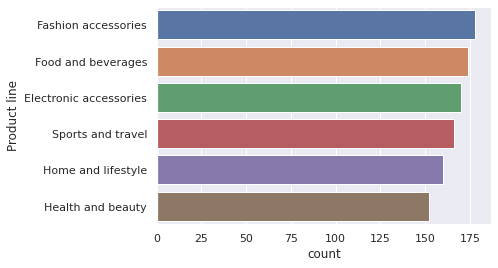

In [ ]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

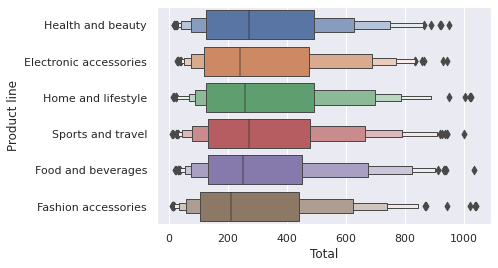

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

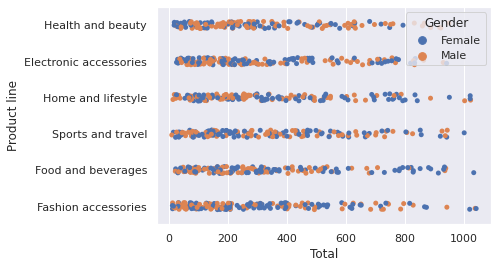

In [ ]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

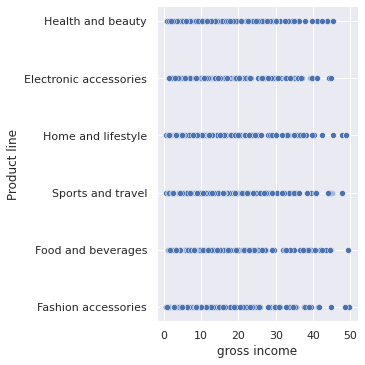

In [ ]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

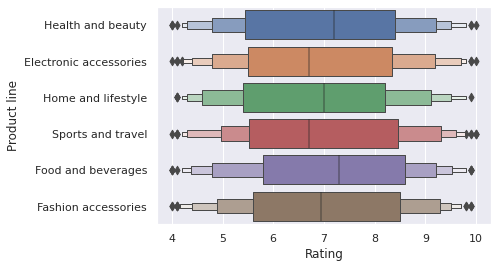

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Let's see when customers buy certain products in the various branches. 

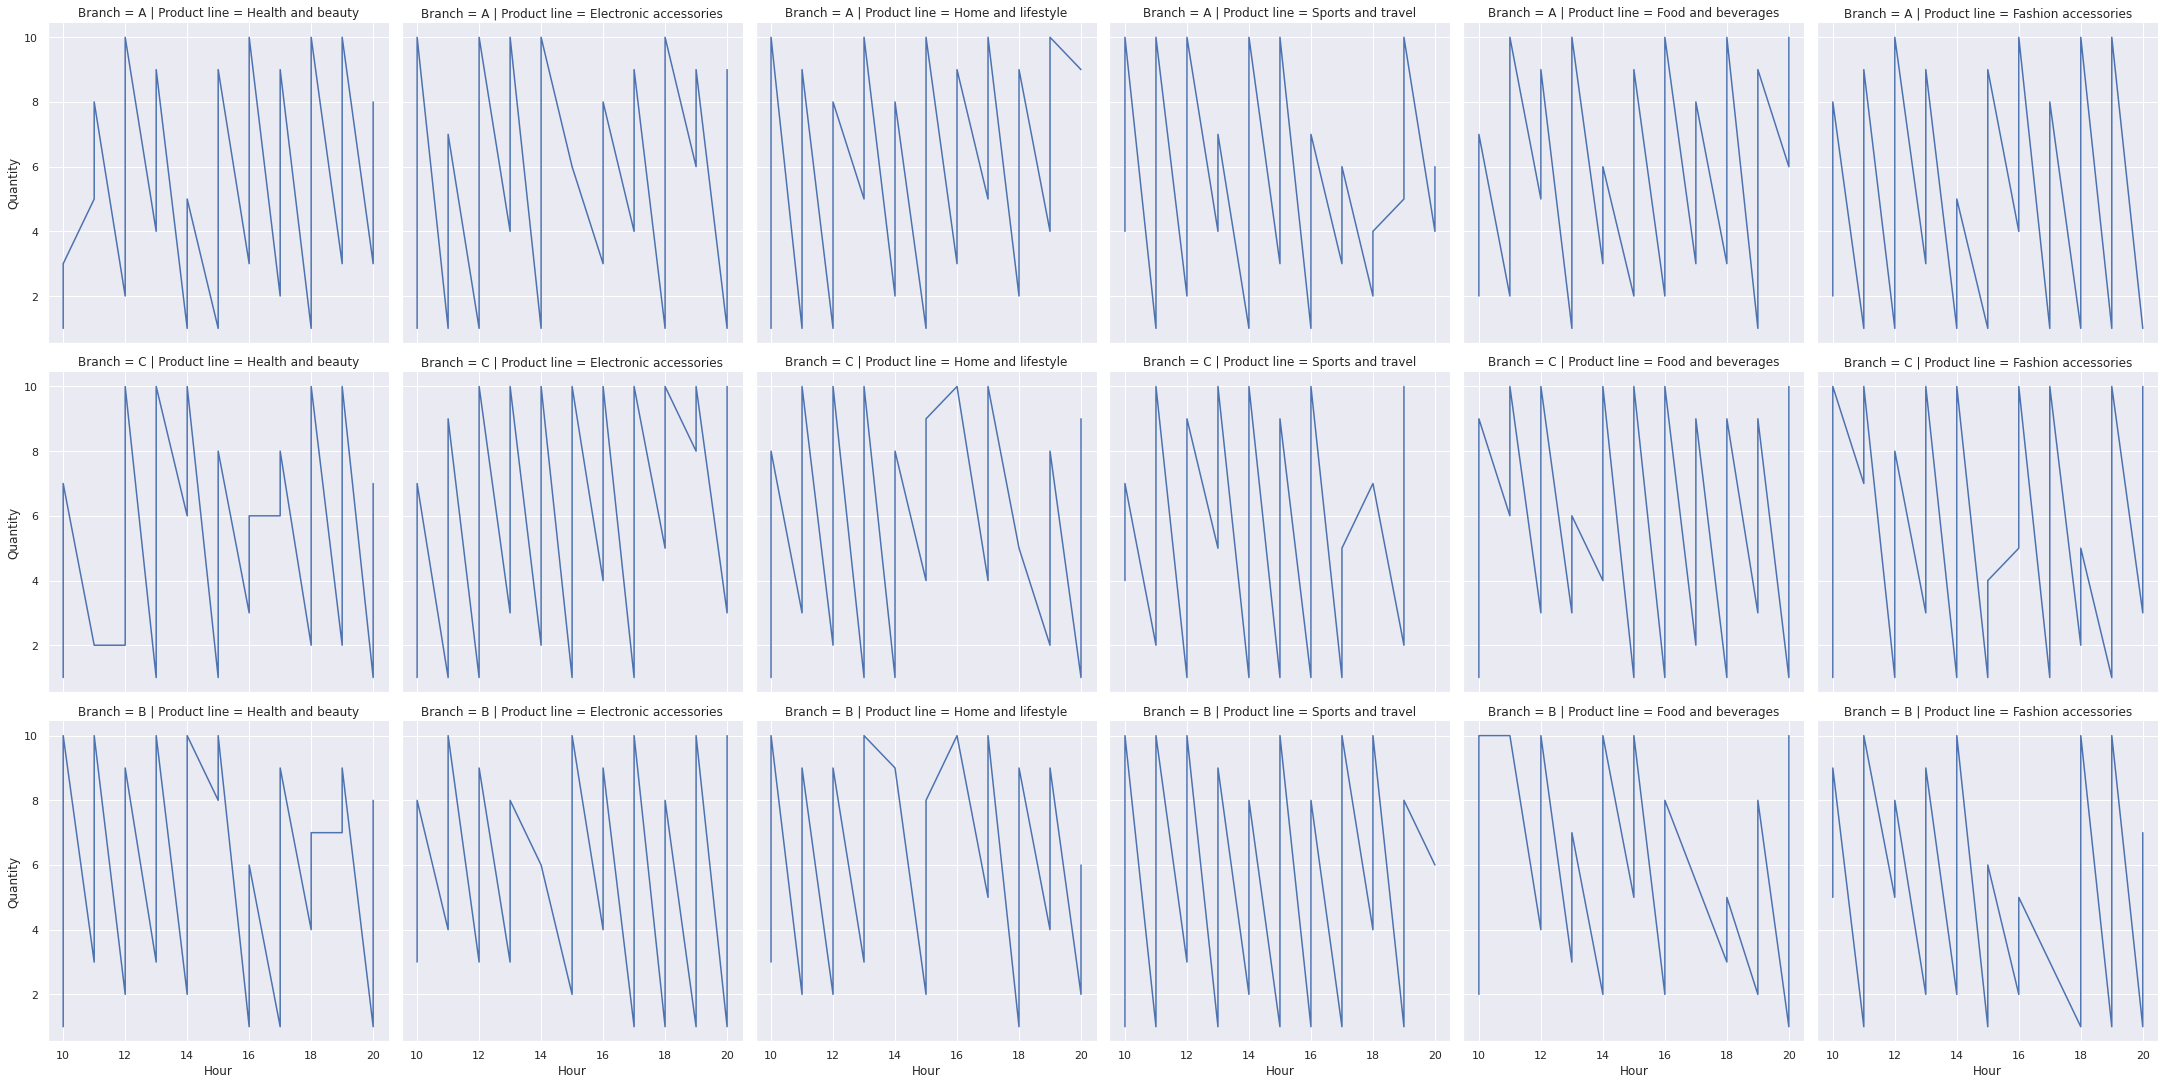

In [ ]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

Text(0.5, 1.0, 'Payment Channel')

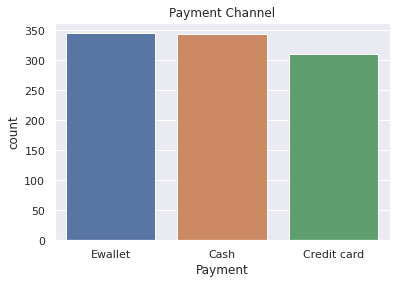

In [ ]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

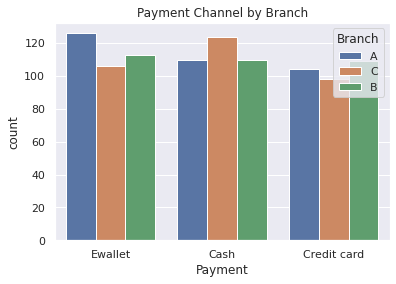

In [ ]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [ ]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

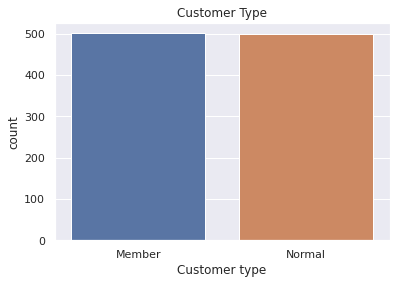

In [ ]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

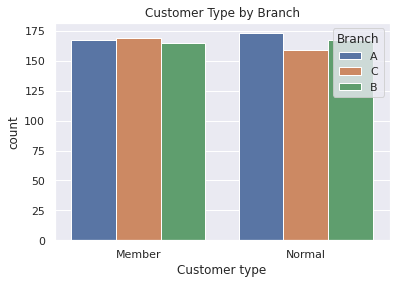

In [ ]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

In [ ]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


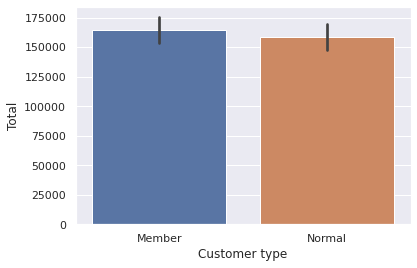

In [ ]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Do the customer type influence customer rating? Let's find out 

Text(0.5, 1.0, 'Customer Type')

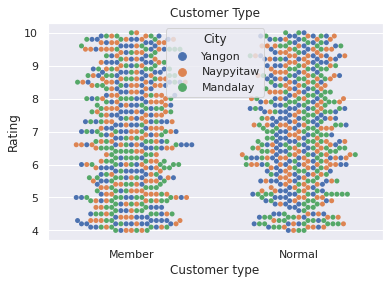

In [ ]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

With the use of google search, I was able to get the longitude and latitude of each cities. We can 

In [ ]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

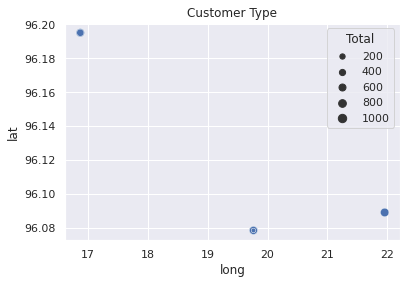

In [ ]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

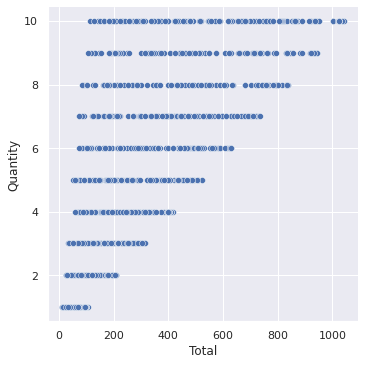

In [ ]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)